# Start Time

In [1]:
import time

start_time = time.time()

# Autos Project for Sprints

The total runtime of the project is 9 minutes and 45 seconds

## ASK

### Reading About the Domain

#### What are the most features that affects the price of used cars? 
- Popularity  
- Age 
- Mileage 
- Accidents 
- Geartype 

  [Resource](https://www.westsideauto.com.au/news/factors-that-impact-the-value-of-your-car)

#### When was the first car invented?
- The first car was invented by Karl Benz in 1886

#### What was the biggest horsepower for a car? 
- The biggest horsepower for a car is 1,500 horsepower. This was achieved by the Bugatti Veyron Super Sport, which was produced from 2010 to 2012. The Veyron Super Sport has a top speed of 267 miles per hour and can accelerate from 0 to 60 miles per hour in 2.4 seconds.


#### What are the project goals?
- To effectively clean the data based on the domain
- To effectively predict the price of the used cars

## PREPARE

### Importing needed packages

In [2]:
# Needed packages to manipulate the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Needed packages to prepare the data for ML
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Needed packages to apply the ML models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Needed packages to test the accuracy of the ML models
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

### Uploading the Dataset

In [3]:
path = "C:/Users/muazs/Desktop/autos.csv"

data = pd.read_csv(path) 

data.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## PROCESS

### Exploring the Dataset

#### Shape

In [4]:
data.shape

(371528, 21)

There are approximately 371.5K rows and 21 columns

#### Description

In [5]:
data.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371528.000000,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,185763.500000,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,107251.039743,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,92881.750000,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,185763.500000,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,278645.250000,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,371527.000000,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


We can see some wrong things obviously
- There is a huge outlier in the price 
- The min year is 1,000 and the max year is 9,999
- The min powerPS is 0 and the max powerPS is 20,000
- The min monthOfRegistration is 0 
- There is no need of nrOfPictures since they are all filled with '0'

In [6]:
data.describe(include=['O'])

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371528,371528,371528,371528,371528,333659,351319,351044,338142,371528,299468,371528,371528
unique,280500,233531,2,2,2,8,2,251,7,40,2,114,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:45:59
freq,7,657,371525,371516,192585,95894,274214,30070,223857,79640,263182,14450,17


Some of the data seems to be categorized like:
- seller             (2 categories)
- offerType          (2 categories)
- abtest             (2 categories)
- vehicleType        (8 categories)
- gearbox            (2 categories)
- model              (251 categories)
- fuelType           (7 categories)
- brand              (40 categories)
- notRepairedDamage  (2 categories)

#### Column Types

In [7]:
data.dtypes

index                   int64
dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

I have total of 21 columns, 8 are integers and 13 are objects

### Removing Irrelevant Attributes

#### After reading the domain those informations are irrelevant to the price

In [8]:
data.drop('index', axis=1, inplace=True)
data.drop('dateCrawled', axis=1, inplace=True)
data.drop('monthOfRegistration', axis=1, inplace=True)
data.drop('dateCreated', axis=1, inplace=True)
data.drop('nrOfPictures', axis=1, inplace=True)
data.drop('postalCode', axis=1, inplace=True) # It would only be relevant if I can extract country names from the postal code
data.drop('lastSeen', axis=1, inplace=True)

#### This features requires further analysis and investigations to decide if they are irrelevant or not  
- seller
- offerType
- abtest
- fuelType

##### Seller

In [9]:
data['seller'].value_counts(normalize = True) *100 

privat        99.999193
gewerblich     0.000807
Name: seller, dtype: float64

privat -> private  
gewerblich -> trade

Since all the column are 'privat' by 99.99% then there is no use for it 

In [10]:
data.drop('seller', axis=1, inplace=True)

##### Offer Type

In [11]:
data['offerType'].value_counts(normalize = True) *100

Angebot    99.99677
Gesuch      0.00323
Name: offerType, dtype: float64

Angebot -> Offer  
Gesuch -> Request

Since all the column are 'Angebot' by 99.99% then there is no use for it 

In [12]:
data.drop('offerType', axis=1, inplace=True)

##### A/B Test

In [13]:
data['abtest'].value_counts(normalize = True) *100

test       51.835932
control    48.164068
Name: abtest, dtype: float64

Since the values are equally distibuted in the column, we will leave it

##### Fuel Type

In [14]:
data['fuelType'].value_counts(normalize = True) *100

benzin     66.202069
diesel     31.864128
lpg         1.590456
cng         0.168864
hybrid      0.082214
andere      0.061513
elektro     0.030756
Name: fuelType, dtype: float64

benzin -> petrol  
diesel -> diesel  
lpg -> liquefied petroleum gas  
cng -> compressed natural gas  
hybrid -> hybrid  
andere -> others  
elektro -> electro  

Since the values might seem to have some importance in the column, we will leave it

### Removing Duplicates

In [15]:
data.duplicated().sum()

7591

In [16]:
data.drop_duplicates(inplace=True)

### Handling Outliers / Logical Errors

##### Fixing Year of Registration

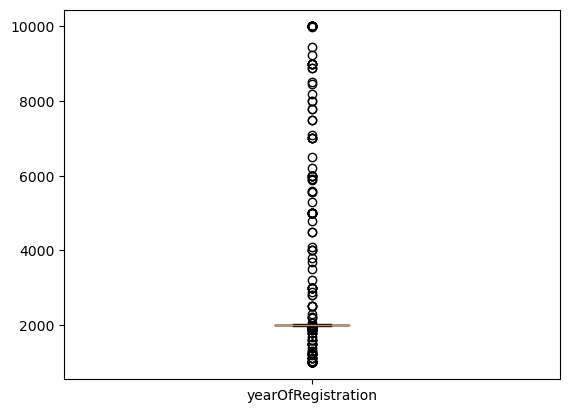

In [17]:
# Drawing a boxplot to check if outliers exist
cols = ['yearOfRegistration']

plt.boxplot(data[cols].values, labels=cols)
plt.show()

In [18]:
# Removing the outliers using logic 
data = data.loc[(data['yearOfRegistration'] <= 2023) & (data['yearOfRegistration'] > 1886)]

In [19]:
# To check if the data is between the assigned dates
print(data['yearOfRegistration'].max())
print(data['yearOfRegistration'].min())

2019
1910


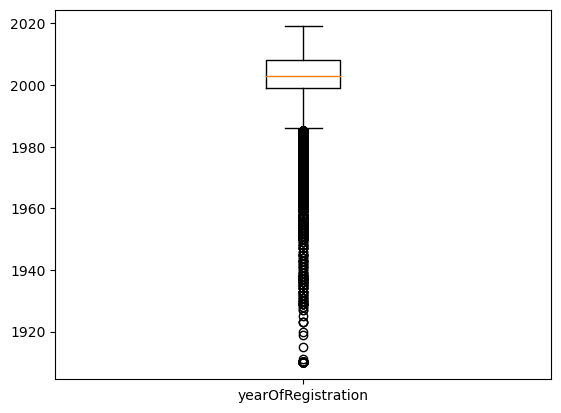

In [20]:
# Drawing a boxplot to check if outliers are removed
cols = ['yearOfRegistration']

plt.boxplot(data[cols].values, labels=cols)
plt.show()

##### Fixing Prices

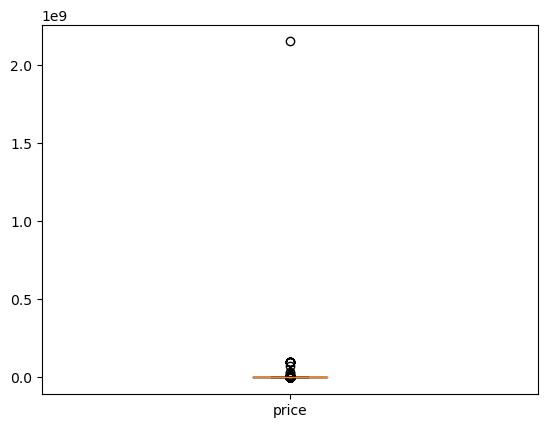

In [21]:
# Drawing a boxplot to check if outliers exist
cols = ['price']

plt.boxplot(data[cols].values, labels=cols)
plt.show()

In [22]:
# Removing the otliers using the Interquartile Range Outlier Detection
q25 = np.percentile(data['price'], 25)
q75 = np.percentile(data['price'], 75)
iqr = q75 - q25

lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

data = data.loc[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

In [23]:
# Removing zero values
data = data.loc[(data['price'] > 0)]

In [24]:
# To check if the data is between the assigned values
print(data['price'].max())
print(data['price'].min())

16270
1


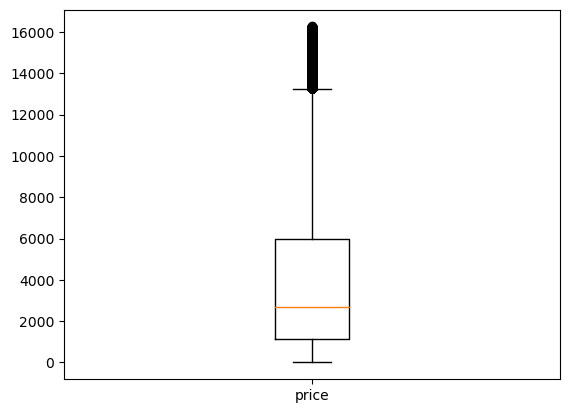

In [25]:
# Drawing a boxplot to check if outliers are removed
cols = ['price']

plt.boxplot(data[cols].values, labels=cols)
plt.show()

##### Fixing powerPS

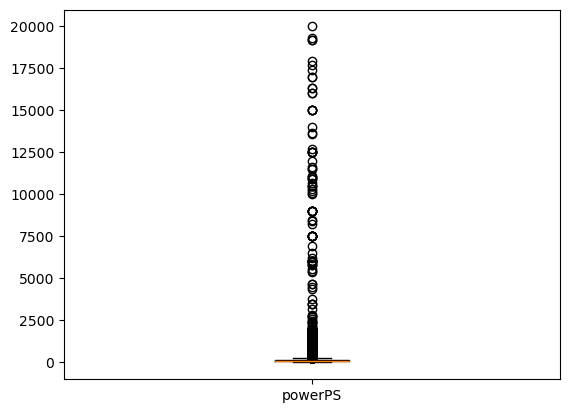

In [26]:
# Drawing a boxplot to check if outliers exist
cols = ['powerPS']

plt.boxplot(data[cols].values, labels=cols)
plt.show()

In [27]:
# Since horsepower is not the same as powerPS we will have to convert it
# The max horsepower recorded was 1500 based on the domain research
# 1 horsepower = 1.01387 metric horsepower (PS)

PS = 1500 * 1.01387

In [28]:
# Removing outliers using logic
data = data.loc[(data['powerPS'] <= PS) & (data['powerPS'] > 0)]

In [29]:
# To check if the data is between the assigned values
print(data['powerPS'].max())
print(data['powerPS'].min())

1506
1


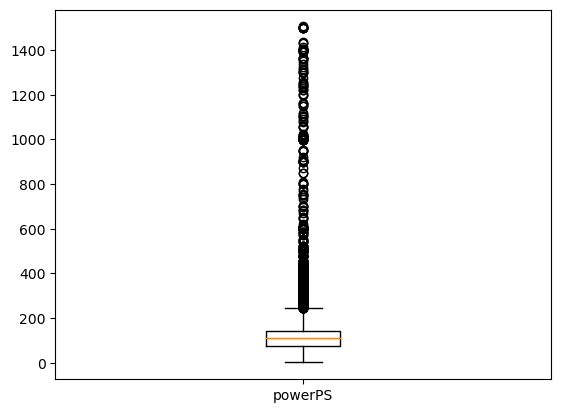

In [30]:
# Drawing a boxplot to check if outliers are removed
cols = ['powerPS']

plt.boxplot(data[cols].values, labels=cols)
plt.show()

### Handling Nulls

In [31]:
data.isnull().sum()

name                      0
price                     0
abtest                    0
vehicleType           20954
yearOfRegistration        0
gearbox                5944
powerPS                   0
model                 12078
kilometer                 0
fuelType              19460
brand                     0
notRepairedDamage     45763
dtype: int64

We can find nulls in  
- vehicleType
- gearbox
- model
- fuelType
- notRepairedDamage  

Let's make a plan to find the missing values based on the mode of different cateorical values
- name + brand -> model
- name + brand + model -> vehicleType
- name + brand + model + vehicleType -> gearbox
- name + brand + model + vehicleType + gearbox -> fuelType
- notRepairedDamage requires further analysis and investigations 

Blocks labeled by "# ChatGPT" is from chatGPT due to errors in my original code and low level in python, but the methodology behind it is to fill the missing values based on the mode based on more than one group for two reasons
1. Because they are textual values not numerical values 
2. Filling all the nulls by the mode of the missing column ONLY can cause bias

#### Filling Model NULLS

Checking Before

In [32]:
data['model'].isnull().sum()

12078

In [33]:
data['model'].value_counts()

golf                  24616
andere                19759
3er                   16705
polo                  10933
corsa                 10336
                      ...  
q3                        3
range_rover_evoque        2
serie_3                   2
gl                        2
rangerover                2
Name: model, Length: 249, dtype: int64

Fixing

In [34]:
# ChatGPT

# Calculate mode for each group
mode_M = data.groupby(['name', 'brand'])['model'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()

# Merge the modes back into the main data_c DataFrame
data = data.merge(mode_M, on=['name', 'brand'], how='left', suffixes=('', '_mode'))

# Fill missing values in 'model' with the corresponding mode from the new column
data['model'] = data.apply(
    lambda row: row['model_mode'] if pd.isnull(row['model']) else row['model'], axis=1
)

# Fill any remaining null values with the overall mode of the 'model' column
overall_mode = data['model'].mode()[0]
data['model'] = data['model'].fillna(overall_mode)

# Drop the auxiliary columns
data = data.drop(['model_mode'], axis=1)

Checking After

In [35]:
data['model'].isnull().sum()

0

In [36]:
data['model'].value_counts()

golf                  34881
andere                19967
3er                   16844
polo                  11005
corsa                 10455
                      ...  
q3                        3
range_rover_evoque        2
serie_3                   2
gl                        2
rangerover                2
Name: model, Length: 249, dtype: int64

#### Filling Vehicle Type NULLS

Checking Before

In [37]:
data['vehicleType'].isnull().sum()

20954

In [38]:
data['vehicleType'].value_counts()

limousine     78234
kleinwagen    68606
kombi         55995
bus           24799
cabrio        17213
coupe         13228
suv            9154
andere         2425
Name: vehicleType, dtype: int64

Fixing

In [39]:
# ChatGPT

# Calculate mode for each group
mode_VT = data.groupby(['name', 'brand', 'model'])['vehicleType'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()

# Merge the modes back into the main data_c DataFrame
data = data.merge(mode_VT, on=['name', 'brand', 'model'], how='left', suffixes=('', '_mode'))

# Fill missing values in 'vehicleType' with the corresponding mode from the new column
data['vehicleType'] = data.apply(
    lambda row: row['vehicleType_mode'] if pd.isnull(row['vehicleType']) else row['vehicleType'], axis=1
)

# Fill any remaining null values with the overall mode of the 'vehicleType' column
overall_mode = data['vehicleType'].mode()[0]
data['vehicleType'] = data['vehicleType'].fillna(overall_mode)

# Drop the auxiliary columns
data = data.drop(['vehicleType_mode'], axis=1)

Checking After

In [40]:
data['vehicleType'].isnull().sum()

0

In [41]:
data['vehicleType'].value_counts()

limousine     96426
kleinwagen    70251
kombi         56446
bus           25108
cabrio        17299
coupe         13400
suv            9198
andere         2480
Name: vehicleType, dtype: int64

#### Filling Gear Box NULLS

Checking Before

In [42]:
data['gearbox'].isnull().sum()

5944

In [43]:
data['gearbox'].value_counts()

manuell      230682
automatik     53982
Name: gearbox, dtype: int64

Fixing

In [44]:
# ChatGPT

# Calculate mode for each group
mode_GB = data.groupby(['name', 'brand', 'model', 'vehicleType'])['gearbox'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()

# Merge the modes back into the main data_c DataFrame
data = data.merge(mode_GB, on=['name', 'brand', 'model', 'vehicleType'], how='left', suffixes=('', '_mode'))

# Fill missing values in 'gearbox' with the corresponding mode from the new column
data['gearbox'] = data.apply(
    lambda row: row['gearbox_mode'] if pd.isnull(row['gearbox']) else row['gearbox'], axis=1
)

# Fill any remaining null values with the overall mode of the 'gearbox' column
overall_mode = data['gearbox'].mode()[0]
data['gearbox'] = data['gearbox'].fillna(overall_mode)

# Drop the auxiliary columns
data = data.drop(['gearbox_mode'], axis=1)

Checking After

In [45]:
data['gearbox'].isnull().sum()

0

In [46]:
data['gearbox'].value_counts()

manuell      236219
automatik     54389
Name: gearbox, dtype: int64

#### Filling Fuel Type NULLS

Checking Before

In [47]:
data['fuelType'].isnull().sum()

19460

In [48]:
data['fuelType'].value_counts()

benzin     184372
diesel      81264
lpg          4681
cng           490
hybrid        177
andere         93
elektro        71
Name: fuelType, dtype: int64

Fixing

In [49]:
# ChatGPT

# Calculate mode for each group
mode_FT = data.groupby(['name', 'brand', 'model', 'vehicleType', 'gearbox'])['fuelType'].apply(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()

# Merge the modes back into the main data_c DataFrame
data = data.merge(mode_FT, on=['name', 'brand', 'model', 'vehicleType', 'gearbox'], how='left', suffixes=('', '_mode'))

# Fill missing values in 'fuelType' with the corresponding mode from the new column
data['fuelType'] = data.apply(
    lambda row: row['fuelType_mode'] if pd.isnull(row['fuelType']) else row['fuelType'], axis=1
)

# Fill any remaining null values with the overall mode of the 'fuelType' column
overall_mode = data['fuelType'].mode()[0]
data['fuelType'] = data['fuelType'].fillna(overall_mode)

# Drop the auxiliary columns
data = data.drop(['fuelType_mode'], axis=1)

Checking After

In [50]:
data['fuelType'].isnull().sum()

0

In [51]:
data['fuelType'].value_counts()

benzin     203357
diesel      81715
lpg          4698
cng           492
hybrid        178
andere         97
elektro        71
Name: fuelType, dtype: int64

#### Filling Not Repaired Damage NULLS

Checking Before

In [52]:
data['notRepairedDamage'].isnull().sum()

45763

In [53]:
data['notRepairedDamage'].value_counts()

nein    215573
ja       29272
Name: notRepairedDamage, dtype: int64

Since 'notRepairedDamage' is one of the main factors affecting the price, we will add a new category called 'unknown' so we would not change the probability of the column to neither 'nein' nor 'ja'

Fixing

In [54]:
data['notRepairedDamage'].fillna('unknown', inplace=True)

Checking After

In [55]:
data['notRepairedDamage'].isnull().sum()

0

In [56]:
data['notRepairedDamage'].value_counts()

nein       215573
unknown     45763
ja          29272
Name: notRepairedDamage, dtype: int64

## ANALYZE

In [57]:
data.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,unknown
1,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
2,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
3,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja
4,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein


### Creating a Copy from the Cleaned Dataset

In [58]:
dataC = data.copy(deep=True)

### Enrichment

#### Creating Age Column

This column is created to check the actual age of the car by subtracting today's year with the 'yearOfRegistration' column 

In [59]:
dataC['age'] = 2023 - dataC['yearOfRegistration']

In [60]:
dataC['age'].describe()

count    290608.000000
mean         19.922621
std           6.862087
min           4.000000
25%          16.000000
50%          20.000000
75%          24.000000
max         113.000000
Name: age, dtype: float64

#### Categorizing Age using Bins

In [61]:
dataC['age'].describe()

count    290608.000000
mean         19.922621
std           6.862087
min           4.000000
25%          16.000000
50%          20.000000
75%          24.000000
max         113.000000
Name: age, dtype: float64

In [62]:
bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1000]
labels = ['00-05', '05-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80',
         '80-90', '90-100', '100+']

dataC['ageCategory'] = pd.cut(dataC['age'], bins=bins, labels=labels)

##### Checking if ageCategory is valid

In [63]:
dataC['ageCategory'].value_counts()

10-20     133931
20-30     122046
05-10      18607
30-40      10524
00-05       2811
40-50       1700
50-60        761
60-70        176
70-80         22
80-90         15
90-100         8
100+           7
Name: ageCategory, dtype: int64

In [64]:
dataC.groupby(['ageCategory'])['price'].mean()

ageCategory
00-05     3652.345073
05-10     5054.964261
10-20     6492.657316
20-30     1932.207545
30-40     2813.822406
40-50     5977.397059
50-60     7468.314060
60-70     7107.982955
70-80     9050.045455
80-90     8973.200000
90-100    9649.875000
100+      1728.714286
Name: price, dtype: float64

#### Categorizing powerPS using Bins

In [65]:
dataC['powerPS'].describe()

count    290608.000000
mean        118.158850
std          56.579308
min           1.000000
25%          75.000000
50%         109.000000
75%         143.000000
max        1506.000000
Name: powerPS, dtype: float64

In [66]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 2000]
labels = ['00-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350',
         '350-400', '400-450','450-500', '500+']

dataC['powerPScategory'] = pd.cut(dataC['powerPS'], bins=bins, labels=labels)

##### Checking if powerPScategory is valid

In [67]:
dataC['powerPScategory'].value_counts()

100-150    124288
50-100     100607
150-200     37611
200-250     12651
00-50        9977
250-300      3040
300-350      1748
350-400       312
500+          209
400-450       116
450-500        49
Name: powerPScategory, dtype: int64

In [68]:
dataC.groupby(['powerPScategory'])['price'].mean()

powerPScategory
00-50       1596.067956
50-100      2633.188844
100-150     4521.775320
150-200     6826.036638
200-250     8515.517429
250-300     8743.763816
300-350     9781.686499
350-400    10523.298077
400-450    10593.810345
450-500    10348.469388
500+        4001.157895
Name: price, dtype: float64

### Encoding the Data for ML

In [69]:
dataML = dataC.copy(deep=True)

In [70]:
dataML.head() 

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,age,ageCategory,powerPScategory
0,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,unknown,19,10-20,150-200
1,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,22,20-30,50-100
2,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,15,10-20,50-100
3,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja,28,20-30,100-150
4,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein,19,10-20,100-150


#### Brand

In [71]:
le_brand = LabelEncoder()
dataML['brand_n'] = le_brand.fit_transform(dataML['brand'])

# To see the code for each value
dataML.groupby('brand')['brand_n'].first() 

brand
alfa_romeo         0
audi               1
bmw                2
chevrolet          3
chrysler           4
citroen            5
dacia              6
daewoo             7
daihatsu           8
fiat               9
ford              10
honda             11
hyundai           12
jaguar            13
jeep              14
kia               15
lada              16
lancia            17
land_rover        18
mazda             19
mercedes_benz     20
mini              21
mitsubishi        22
nissan            23
opel              24
peugeot           25
porsche           26
renault           27
rover             28
saab              29
seat              30
skoda             31
smart             32
sonstige_autos    33
subaru            34
suzuki            35
toyota            36
trabant           37
volkswagen        38
volvo             39
Name: brand_n, dtype: int32

In [72]:
# Removing the original column
dataML.drop('brand', axis=1, inplace=True)

#### Model

In [73]:
le_model = LabelEncoder()
dataML['model_n'] = le_model.fit_transform(dataML['model'])

# To see the code for each value
dataML.groupby('model')['model_n'].first()

model
100          0
145          1
147          2
156          3
159          4
          ... 
yaris      244
yeti       245
ypsilon    246
z_reihe    247
zafira     248
Name: model_n, Length: 249, dtype: int32

In [74]:
# Removing the original column
dataML.drop('model', axis=1, inplace=True)

#### Name

In [75]:
le_name = LabelEncoder()
dataML['name_n'] = le_name.fit_transform(dataML['name'])

# To see the code for each value
dataML.groupby('name')['name_n'].first()

name
!!!!!!!!!!!!!!!!_VERKAUFE_OPEL_CORSA_B_!!!!!!!!!!!!!!!                     0
!!!!!!!!!!!!!!Renault_Clio_5_Tuerig_Servolenkung_!!!!!!!!!!!!!!!!!         1
!!!!!!!!!!!!_Seat_Toledo_1M_!!!!!!!!!!!                                    2
!!!!!!!!!!Corsa_D_5_Tuerer_tuev_Neu_03/2018!!!!!!!!!!                      3
!!!!!!!!BMW_530D_Touring_Vollausstattung!!!!!!                             4
                                                                       ...  
•_Polo_6N_•_TÜV/AU_NEU_•_3.HAND_•_VIELE_EXTRAS.._•                    182495
•_Zuverlaessiges_Auto_vom_Kfz_Mechatroniker_zu_verkaufen_•            182496
•••_TOP_Twingo__C06__•••_54.100KM_•••                                 182497
€€€_Mercedes_Benz_E200_Kompressor___Garage___Scheckheft_€€€           182498
€€€_Mercedes_E200_Kompressor___Garagenwagen___Scheckheft_€€€          182499
Name: name_n, Length: 182500, dtype: int32

In [76]:
# Removing the original column
dataML.drop('name', axis=1, inplace=True)

#### Vehicle Type

In [77]:
le_vehicleType = LabelEncoder()
dataML['vehicleType_n'] = le_vehicleType.fit_transform(dataML['vehicleType'])

# To see the code for each value
dataML.groupby('vehicleType')['vehicleType_n'].first()

vehicleType
andere        0
bus           1
cabrio        2
coupe         3
kleinwagen    4
kombi         5
limousine     6
suv           7
Name: vehicleType_n, dtype: int32

In [78]:
# Removing the original column
dataML.drop('vehicleType', axis=1, inplace=True)

#### Gearbox

In [79]:
le_gearbox = LabelEncoder()
dataML['gearbox_n'] = le_gearbox.fit_transform(dataML['gearbox'])

# To see the code for each value
dataML.groupby('gearbox')['gearbox_n'].first()

gearbox
automatik    0
manuell      1
Name: gearbox_n, dtype: int32

In [80]:
# Removing the original column
dataML.drop('gearbox', axis=1, inplace=True)

#### Power PS Category

In [81]:
le_powerPScategory = LabelEncoder()
dataML['powerPScategory_n'] = le_powerPScategory.fit_transform(dataML['powerPScategory'])

# To see the code for each value
dataML.groupby('powerPScategory')['powerPScategory_n'].first()

powerPScategory
00-50       0
50-100      9
100-150     1
150-200     2
200-250     3
250-300     4
300-350     5
350-400     6
400-450     7
450-500     8
500+       10
Name: powerPScategory_n, dtype: int32

In [82]:
# Removing the original column
dataML.drop('powerPScategory', axis=1, inplace=True)

#### Fuel Type

In [83]:
le_fuelType = LabelEncoder()
dataML['fuelType_n'] = le_fuelType.fit_transform(dataML['fuelType'])

# To see the code for each value
dataML.groupby('fuelType')['fuelType_n'].first()

fuelType
andere     0
benzin     1
cng        2
diesel     3
elektro    4
hybrid     5
lpg        6
Name: fuelType_n, dtype: int32

In [84]:
# Removing the original column
dataML.drop('fuelType', axis=1, inplace=True)

#### Not Repaired Damage

In [85]:
le_notRepairedDamage = LabelEncoder()
dataML['notRepairedDamage_n'] = le_notRepairedDamage.fit_transform(dataML['notRepairedDamage'])

# To see the code for each value
dataML.groupby('notRepairedDamage')['notRepairedDamage_n'].first()

notRepairedDamage
ja         0
nein       1
unknown    2
Name: notRepairedDamage_n, dtype: int32

In [86]:
# Removing the original column
dataML.drop('notRepairedDamage', axis=1, inplace=True)

#### Age Category

In [87]:
le_ageCategory = LabelEncoder()
dataML['ageCategory_n'] = le_ageCategory.fit_transform(dataML['ageCategory'])

# To see the code for each value
dataML.groupby('ageCategory')['ageCategory_n'].first()

ageCategory
00-05      0
05-10      1
10-20      2
20-30      4
30-40      5
40-50      6
50-60      7
60-70      8
70-80      9
80-90     10
90-100    11
100+       3
Name: ageCategory_n, dtype: int32

In [88]:
# Removing the original column
dataML.drop('ageCategory', axis=1, inplace=True)

#### AB Test

In [89]:
le_abtest = LabelEncoder()
dataML['abtest_n'] = le_abtest.fit_transform(dataML['abtest'])

# To see the code for each value
dataML.groupby('abtest')['abtest_n'].first()

abtest
control    0
test       1
Name: abtest_n, dtype: int32

In [90]:
# Removing the original column
dataML.drop('abtest', axis=1, inplace=True)

### Orgaznizing the Columns

In [91]:
dataML = dataML[['brand_n','model_n','name_n','vehicleType_n','gearbox_n','powerPS','powerPScategory_n',
               'fuelType_n','kilometer','notRepairedDamage_n','yearOfRegistration','age','ageCategory_n',
               'abtest_n','price']]

## MACHINE LEARNING

### Creating a Copy for the ML Models

In [92]:
dataMLM = dataML.copy(deep=True)

### Normalizing the Data

In [93]:
# Assuming dataML is a pandas DataFrame
original_columns = dataMLM.columns  # Store the column names

scaler = MinMaxScaler()
dataMLM = scaler.fit_transform(dataMLM)

# Convert the scaled NumPy array back to a pandas DataFrame
dataMLM = pd.DataFrame(dataMLM, columns=original_columns)

In [94]:
dataMLM.head()

,brand_n,model_n,name_n,vehicleType_n,gearbox_n,powerPS,powerPScategory_n,fuelType_n,kilometer,notRepairedDamage_n,yearOfRegistration,age,ageCategory_n,abtest_n,price
0,0.358974,0.475806,0.384117,1.000000,0.0,0.107641,0.2,0.500000,0.827586,1.0,0.862385,0.137615,0.181818,1.0,0.602311
1,0.974359,0.471774,0.323289,0.571429,1.0,0.049169,0.9,0.166667,1.000000,0.5,0.834862,0.165138,0.363636,1.0,0.092138
2,0.794872,0.411290,0.729325,0.571429,1.0,0.045183,0.9,0.500000,0.586207,0.5,0.899083,0.100917,0.181818,1.0,0.221218
3,0.051282,0.044355,0.110532,0.857143,1.0,0.067110,0.1,0.166667,1.000000,0.0,0.779817,0.220183,0.363636,1.0,0.039892
4,0.641026,0.032258,0.621061,0.285714,1.0,0.071761,0.1,0.166667,1.000000,0.5,0.862385,0.137615,0.181818,1.0,0.135165


### Correlation for Feature Extraction

In [95]:
dataCor = dataMLM[['powerPS','kilometer','yearOfRegistration','age','price']]
cor = dataCor.corr()
cor.style.background_gradient(cmap='RdYlGn')

,powerPS,kilometer,yearOfRegistration,age,price
powerPS,1.000000,0.131299,0.075761,-0.075761,0.428582
kilometer,0.131299,1.000000,-0.223516,0.223516,-0.342168
yearOfRegistration,0.075761,-0.223516,1.000000,-1.000000,0.412234
age,-0.075761,0.223516,-1.000000,1.000000,-0.412234
price,0.428582,-0.342168,0.412234,-0.412234,1.000000


I extracted only the features that were not encoded. Since, I believe the numerical encode will give me fake information  

As we can see the powerPS, kilometer, yearOfRegistration, and age have huge effect on the price so they are main features for us and can not be removed

In [96]:
cor = dataMLM.corr()
cor.style.background_gradient(cmap='RdYlGn')

,brand_n,model_n,name_n,vehicleType_n,gearbox_n,powerPS,powerPScategory_n,fuelType_n,kilometer,notRepairedDamage_n,yearOfRegistration,age,ageCategory_n,abtest_n,price
brand_n,1.000000,0.487768,0.833210,-0.108302,0.103269,-0.296885,0.182333,-0.042768,-0.050089,0.019511,-0.007531,0.007531,0.018168,0.004206,-0.099736
model_n,0.487768,1.000000,0.466469,-0.182398,0.059399,-0.145679,0.106992,0.020995,-0.021508,0.011767,0.058400,-0.058400,-0.047887,0.002355,-0.027460
name_n,0.833210,0.466469,1.000000,-0.121786,0.092527,-0.255575,0.146168,-0.028684,-0.048778,-0.001263,0.008396,-0.008396,0.003293,0.003908,-0.086751
vehicleType_n,-0.108302,-0.182398,-0.121786,1.000000,-0.088876,0.126130,-0.064953,-0.006522,0.057442,0.025547,0.059304,-0.059304,-0.038325,0.001228,-0.020692
gearbox_n,0.103269,0.059399,0.092527,-0.088876,1.000000,-0.372149,0.138339,-0.143079,-0.031774,0.018544,-0.010339,0.010339,0.030702,0.000454,-0.223189
powerPS,-0.296885,-0.145679,-0.255575,0.126130,-0.372149,1.000000,-0.412807,0.194397,0.131299,-0.020279,0.075761,-0.075761,-0.104595,-0.005444,0.428582
powerPScategory_n,0.182333,0.106992,0.146168,-0.064953,0.138339,-0.412807,1.000000,-0.209042,-0.137414,0.020979,-0.024048,0.024048,0.041540,0.002150,-0.248703
fuelType_n,-0.042768,0.020995,-0.028684,-0.006522,-0.143079,0.194397,-0.209042,1.000000,0.163210,-0.025770,0.163960,-0.163960,-0.196073,-0.002587,0.243945
kilometer,-0.050089,-0.021508,-0.048778,0.057442,-0.031774,0.131299,-0.137414,0.163210,1.000000,0.002281,-0.223516,0.223516,0.214135,-0.004239,-0.342168
notRepairedDamage_n,0.019511,0.011767,-0.001263,0.025547,0.018544,-0.020279,0.020979,-0.025770,0.002281,1.000000,0.026303,-0.026303,-0.022429,-0.003132,0.005670


And here I have extracted all the features correlations and we can see that those are the most features that affects on the price:
- gearbox_n 
- powerPS	
- powerPScategory_n	
- fuelType_n	
- kilometer 
- yearOfRegistration	
- age	
- ageCategory_n

### Features Variables 

In [97]:
feature_cols = ['brand_n',
                'model_n',
                'name_n',
                'vehicleType_n',
                'gearbox_n',
                'powerPS',
                #'powerPScategory_n',
                'fuelType_n',
                'kilometer',
                'notRepairedDamage_n',
                'yearOfRegistration',
                'age',
                #'ageCategory_n',
                #'abtest_n'
                ]

x = dataMLM[feature_cols] 
x.head()

,brand_n,model_n,name_n,vehicleType_n,gearbox_n,powerPS,fuelType_n,kilometer,notRepairedDamage_n,yearOfRegistration,age
0,0.358974,0.475806,0.384117,1.000000,0.0,0.107641,0.500000,0.827586,1.0,0.862385,0.137615
1,0.974359,0.471774,0.323289,0.571429,1.0,0.049169,0.166667,1.000000,0.5,0.834862,0.165138
2,0.794872,0.411290,0.729325,0.571429,1.0,0.045183,0.500000,0.586207,0.5,0.899083,0.100917
3,0.051282,0.044355,0.110532,0.857143,1.0,0.067110,0.166667,1.000000,0.0,0.779817,0.220183
4,0.641026,0.032258,0.621061,0.285714,1.0,0.071761,0.166667,1.000000,0.5,0.862385,0.137615


### Target Variable

In [98]:
y = dataMLM['price']
y.head()

0    0.602311
1    0.092138
2    0.221218
3    0.039892
4    0.135165
Name: price, dtype: float64

### Splitting the Dataset to Testing and Training

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### Models

#### Multilinear Regression

In [100]:
# Create and train the Multilinear Regression model
modelMLR = LinearRegression()
modelMLR.fit(x_train, y_train)

LinearRegression()

In [101]:
# Make predictions on the test data
y_pred = modelMLR.predict(x_test)

# Calculate MSE and R-squared
mseMLR = mean_squared_error(y_test, y_pred)
r2MLR = r2_score(y_test, y_pred)

print("Mean Squared Error:", mseMLR)
print("R-squared:", r2MLR)

Mean Squared Error: 0.030447487016114248
R-squared: 0.4692154555004471


#### Polynomial Regression

In [102]:
# Create and train the Polynomial Regression model
degree = 3  # Degree of polynomial
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

modelPR = LinearRegression()
modelPR.fit(x_train_poly, y_train)

LinearRegression()

In [103]:
# Make predictions on the test data
y_pred = modelPR.predict(x_test_poly)

# Calculate metrics
msePR = mean_squared_error(y_test, y_pred)
r2PR = r2_score(y_test, y_pred)

print("Polynomial Regression (Degree {}):".format(degree))
print("Mean Squared Error:", msePR)
print("R-squared:", r2PR)

Polynomial Regression (Degree 3):
Mean Squared Error: 0.018348520279533095
R-squared: 0.6801341610340983


### Models Comparison

In [104]:
# Create a datarame to collect the scores for the model
models = pd.DataFrame({
    'Model': ['Multilinear', 'Polynomial'],
    'MSE Score': [mseMLR, msePR],
    'R2 Score': [r2MLR, r2PR]})

# Convert the scores to readable strings
models['MSE Score'] = models['MSE Score'].apply(lambda x: '{:.2f}'.format(x))
models['R2 Score'] = models['R2 Score'].apply(lambda x: '{:.2f}'.format(x))

# Sort the DataFrame by 'MSE Score' column in ascending order
sorted_models = models.sort_values(by='MSE Score', ascending=True)

# Display the sorted DataFrame
print(sorted_models)

         Model MSE Score R2 Score
1   Polynomial      0.02     0.68
0  Multilinear      0.03     0.47


After many testing and trying different combinations of features, the Polynomial Reression is the best

The split that best occured those scores are the 70/30 split

# End Time

In [105]:
end_time = time.time()
elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print("Total runtime:", minutes, "minutes and", seconds, "seconds")

Total runtime: 8 minutes and 39 seconds
